In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from matplotlib.patches import Rectangle
%matplotlib inline

2023-09-23 16:23:41.479452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 16:23:42.050053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def read_jpg(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img

def test_image_load(path):
    img=read_jpg(path)
    img = tf.image.resize(img, (224, 224))
    img = tf.cast(img, tf.float32)
    img = img/255.0
    return img

In [3]:
#加载模型
new_model=tf.keras.models.load_model('/home/jhr/Program/TensorFlow/00-model/segmentation_v1.h5')#语义分割
lo_model=tf.keras.models.load_model('/home/jhr/Program/TensorFlow/00-model/location_v1.h5')#图像定位

2023-09-23 16:23:48.881605: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 16:23:48.905472: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 16:23:48.905636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
# load image
test_img=test_image_load('/home/jhr/Pictures/1.png')
test_img.shape

TensorShape([224, 224, 3])

In [8]:
test_img=np.expand_dims(test_img,0)
test_img.shape

(1, 224, 224, 3)

# 语义分割

In [0]:
out_img=new_model.predict(test_img)

In [11]:
out_img=tf.argmax(out_img,axis=-1)
out_img=out_img[...,tf.newaxis]

NameError: name 'out_img' is not defined

NameError: name 'out_img' is not defined

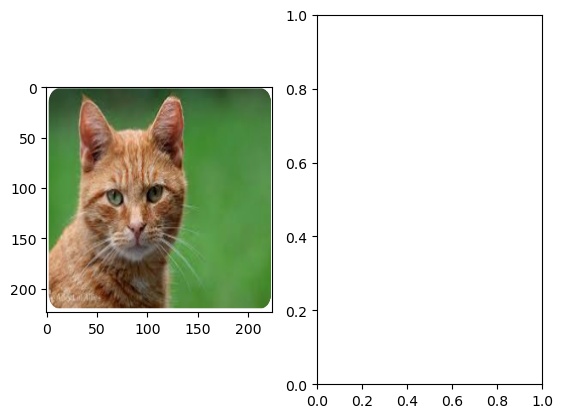

In [10]:
    plt.subplot(1, 2, 1)
    plt.imshow(test_img[0])
    plt.subplot(1, 2, 2)
    plt.imshow(out_img[0])

In [32]:
# lo_model.summary()

# 图像定位

In [33]:
out1, out2, out3, out4=lo_model.predict(test_img)

1/1 [==============================] - 0s 90ms/step


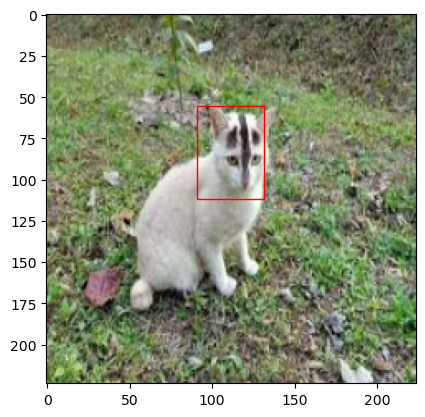

In [34]:
 plt.imshow(test_img[0])
xmin, ymin, xmax, ymax = out1[0] * \
    224, out2[0]*224, out3[0]*224, out4[0]*224
rect = Rectangle((xmin, ymin), (xmax-xmin),
                 (ymax-ymin), fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)
plt.show()